In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [36]:
from keras.datasets import mnist

(Xtr, ytr), (Xts, yts) = mnist.load_data()

In [37]:
Xtr_flat = Xtr.reshape(Xtr.shape[0],-1)
Xts_flat = Xts.reshape(Xts.shape[0],-1)

#i was having exploding gradient, so i normalized in this way
Xts_flat = Xts_flat / 255
Xtr_flat = Xtr_flat / 255

Xtr_flat.shape

(60000, 784)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

hidden_size = 100

autoencoder = Sequential(
                [
                    Dense(Xtr_flat.shape[1],activation="tanh"),
                    Dense(hidden_size,activation="tanh"),
                    Dense(Xtr_flat.shape[1],activation="tanh")
                ]
)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(Xtr_flat,Xtr_flat, epochs=20, batch_size=400)

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0587
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0200
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0142
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0118
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0105
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0096
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0092
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0089
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0086
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0085
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0084
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0084
Epoch 13/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0083
Epoch 14/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0083
Epoch 15/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s

In [66]:
Xtr_flat.shape

(60000, 784)

In [5]:
prediction = autoencoder.predict(Xts_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

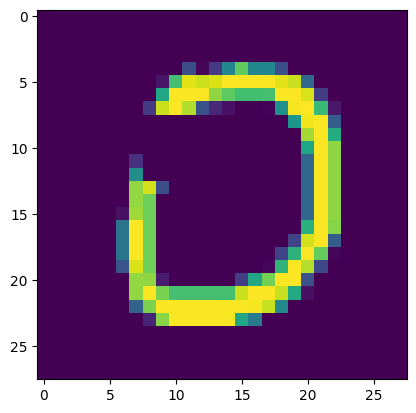

In [239]:
import random
seed_y= int((random.random()*1000)%23)
seed_x = int((random.random()*1000)%23)

random_image = Xts_flat[10].reshape(28,28)
square_size = 10
copy = np.copy(random_image)
for i in range(seed_y,seed_y+5):
    for k in range(seed_x,seed_x+5):
        copy[i,k] = 0
plt.imshow(copy)
plt.show

(784,)


<function matplotlib.pyplot.show(close=None, block=None)>

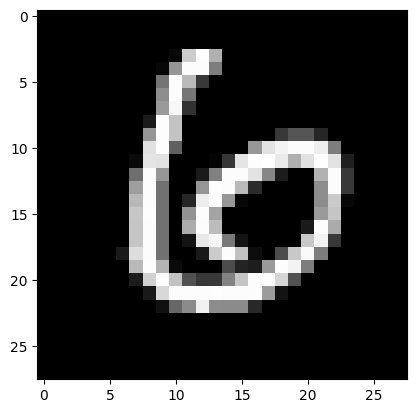

In [142]:
import random

noisy_image = Xts_flat[11]
noisy_copy = np.copy(noisy_image)
print(noisy_copy.shape)
for i,_ in enumerate(noisy_copy):
    noisy_copy[i]=noisy_copy[i] + random.random()*0.00
plt.imshow(noisy_copy.reshape(28,28),cmap="gray")
plt.show


In [143]:
copy_reshaped = noisy_copy.reshape(-1,len(noisy_copy))
copy_reshaped.shape

(1, 784)

In [144]:
copy_prediction = autoencoder.predict(copy_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

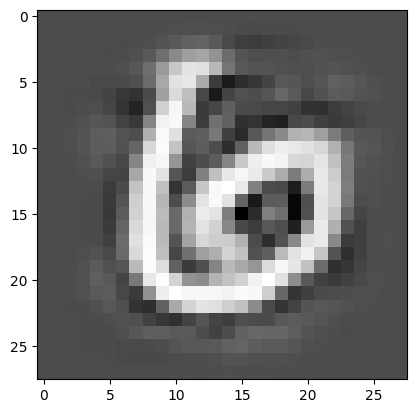

In [145]:
plt.imshow(copy_prediction.reshape(28,28),cmap="gray")
plt.show

In [6]:
encoder_model = Sequential(autoencoder.layers[:-1])

# Ottenere l'output del secondo layer per un dato input
second_layer_output = encoder_model.predict(Xts_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [7]:
second_layer_output.shape

(10000, 100)

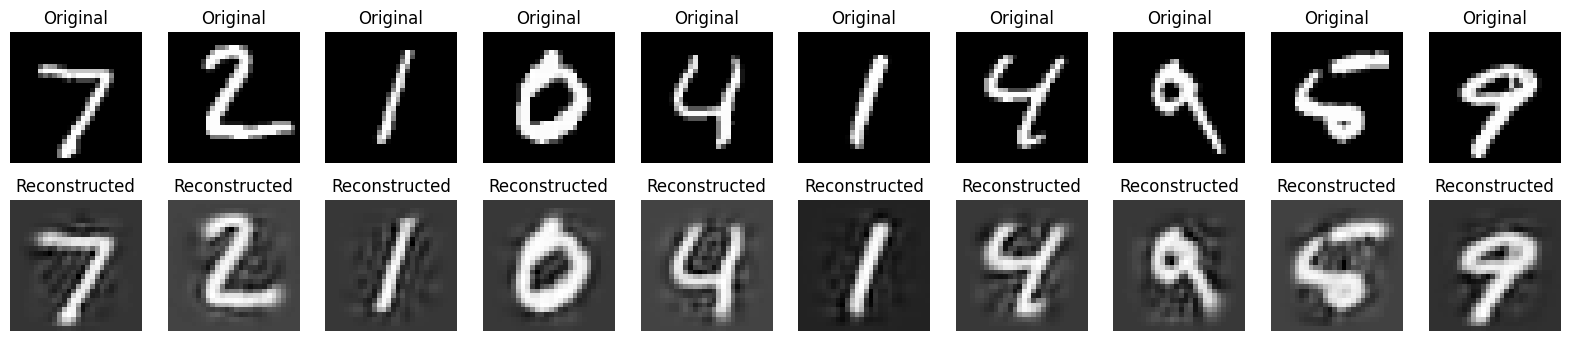

In [8]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    # Immagine originale
    plt.subplot(2, num_images, i + 1)
    plt.imshow(Xts_flat[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Immagine ricostruita
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(prediction[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


In [9]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(second_layer_output)

In [10]:
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

# Estrai le coordinate X e Y dall'embedded_data
x = pd.DataFrame(X_embedded[:, 0])
y = pd.DataFrame(X_embedded[:, 1])
label = pd.DataFrame(yts)

dataset = pd.concat([x,y,label],axis=1)
dataset.columns = ['x','y','number']

plt.figure(figsize=(12, 8))
sct = plt.scatter(dataset.x, dataset.y, c=dataset.number, cmap='tab10')


cb = plt.colorbar(label='Cifra', ticks=range(10))

plt.title('t-SNE Plot MNIST')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
a = dataset[(dataset.number == 1) & (dataset.x<-25)]
a

,x,y,number
1773,-46.429008,-4.853357,1
5331,-53.931629,-2.782497,1
5457,-53.888756,-2.494162,1
5642,-53.558899,-2.872576,1


<function matplotlib.pyplot.show(close=None, block=None)>

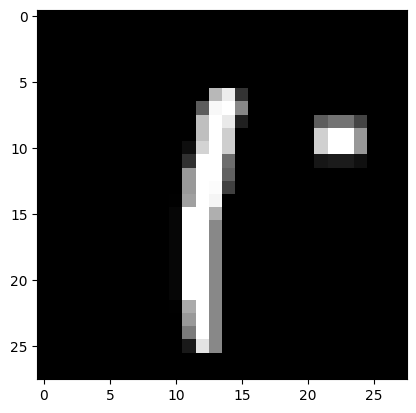

In [ ]:
plt.imshow(Xts_flat[5642].reshape(28,28),cmap="gray")
plt.show